In [1]:
# !pip install emoji beautifulsoup4 textblob wordcloud

In [2]:
# -------------------------------
# ADVANCED TEXT CLEANING & VISUALIZATION
# -------------------------------

import pandas as pd
import re
import emoji
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load Sample Data
# -------------------------------
data = pd.DataFrame({
    'text': [
        "Visit my blog at https://example.com for more info! 😃",
        "Contact me at email@example.com or @username",
        "<p>This is HTML content</p>",
        "I loooove NLP soooo much!!!"
    ]
})


In [3]:
# -------------------------------
# 2. Remove URLs
# -------------------------------
data['clean'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))


In [4]:
# -------------------------------
# 3. Remove Emails & Mentions
# -------------------------------
data['clean'] = data['clean'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
data['clean'] = data['clean'].apply(lambda x: re.sub(r'@\w+', '', x))


In [5]:
# -------------------------------
# 4. Remove HTML Tags
# -------------------------------
data['clean'] = data['clean'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [6]:
# -------------------------------
# 5. Remove Emojis
# -------------------------------
data['clean'] = data['clean'].apply(lambda x: emoji.replace_emoji(x, replace=''))



In [7]:
# -------------------------------
# 6. Spelling Correction
# -------------------------------
data['corrected'] = data['clean'].apply(lambda x: str(TextBlob(x).correct()))


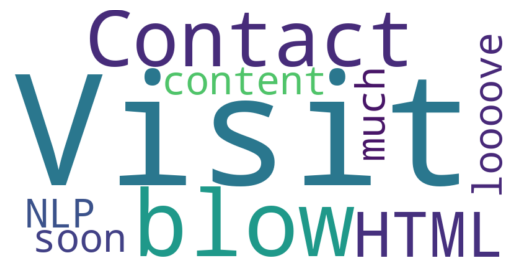

,text,clean,corrected
0,Visit my blog at https://example.com for more ...,Visit my blog at for more info!,Visit my blow at for more into!
1,Contact me at email@example.com or @username,Contact me at or,Contact me at or
2,<p>This is HTML content</p>,This is HTML content,His is HTML content
3,I loooove NLP soooo much!!!,I loooove NLP soooo much!!!,I loooove NLP soon much!!!


In [8]:
# -------------------------------
# 7. Word Cloud
# -------------------------------
all_text = " ".join(data['corrected'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

data
